In [97]:
import pandas as pd
import numpy as np

In [98]:
df = pd.read_csv('loan_approval_dataset.csv')

In [99]:
df.head()

,loan_id,no_of_dependents,education,self_employed,income_annum,loan_amount,loan_term,cibil_score,residential_assets_value,commercial_assets_value,luxury_assets_value,bank_asset_value,loan_status
0,1,2,Graduate,No,9600000,29900000,12,778,2400000,17600000,22700000,8000000,Approved
1,2,0,Not Graduate,Yes,4100000,12200000,8,417,2700000,2200000,8800000,3300000,Rejected
2,3,3,Graduate,No,9100000,29700000,20,506,7100000,4500000,33300000,12800000,Rejected
3,4,3,Graduate,No,8200000,30700000,8,467,18200000,3300000,23300000,7900000,Rejected
4,5,5,Not Graduate,Yes,9800000,24200000,20,382,12400000,8200000,29400000,5000000,Rejected


In [100]:
from sklearn.preprocessing import LabelEncoder

In [101]:
le=LabelEncoder()

In [102]:
mapping = {' Graduate': 0, ' Not Graduate': 1}

In [103]:
df[' education'] = le.fit_transform(df[' education'])


In [104]:
df[' loan_status'] = le.fit_transform(df[' loan_status'])

In [105]:
df[' self_employed'] = le.fit_transform(df[' self_employed'])

In [106]:
from sklearn.preprocessing import StandardScaler

In [107]:
x = df.drop(columns=[' loan_status'])

In [108]:
x.head()

,loan_id,no_of_dependents,education,self_employed,income_annum,loan_amount,loan_term,cibil_score,residential_assets_value,commercial_assets_value,luxury_assets_value,bank_asset_value
0,1,2,0,0,9600000,29900000,12,778,2400000,17600000,22700000,8000000
1,2,0,1,1,4100000,12200000,8,417,2700000,2200000,8800000,3300000
2,3,3,0,0,9100000,29700000,20,506,7100000,4500000,33300000,12800000
3,4,3,0,0,8200000,30700000,8,467,18200000,3300000,23300000,7900000
4,5,5,1,1,9800000,24200000,20,382,12400000,8200000,29400000,5000000


In [109]:
x=x.drop(columns=['loan_id'])

In [110]:
y = df[' loan_status']

In [111]:
from sklearn.model_selection import train_test_split

In [138]:
xtrain,xtest,ytrain,ytest=train_test_split(xt,y,test_size=0.2)

In [139]:
from sklearn.linear_model import LogisticRegression

In [140]:
lr=LogisticRegression()

In [141]:
lr.fit(xtrain,ytrain)

LogisticRegression()

In [142]:
ypred=lr.predict(xtest)

In [143]:
from sklearn.metrics import accuracy_score

In [144]:
acc=accuracy_score(ypred,ytest)

In [145]:
acc

0.9074941451990632

In [146]:
from sklearn.svm import SVC

In [147]:
sv=SVC(kernel='rbf')

sv.fit(xtrain,ytrain)

SVC()

In [148]:
ypred1=sv.predict(xtest)
acc=accuracy_score(ypred1,ytest)


In [149]:
acc

0.9332552693208431

In [150]:
from sklearn.ensemble import RandomForestClassifier

In [151]:
rm = RandomForestClassifier()

rm.fit(xtrain,ytrain)

ypred2=rm.predict(xtest)

acc=accuracy_score(ypred2,ytest)

In [152]:
acc

0.9812646370023419

In [128]:
from sklearn.neighbors import KNeighborsClassifier
neigh = KNeighborsClassifier(n_neighbors=3)


neigh.fit(xtrain,ytrain)

KNeighborsClassifier(n_neighbors=3)

In [129]:
ypred4=neigh.predict(xtest)

In [130]:
acc=accuracy_score(ypred4,ytest)

In [131]:
acc

0.5480093676814989

In [132]:
from sklearn.metrics import confusion_matrix

In [133]:
cm=confusion_matrix(ytest,ypred2)

<Axes: >

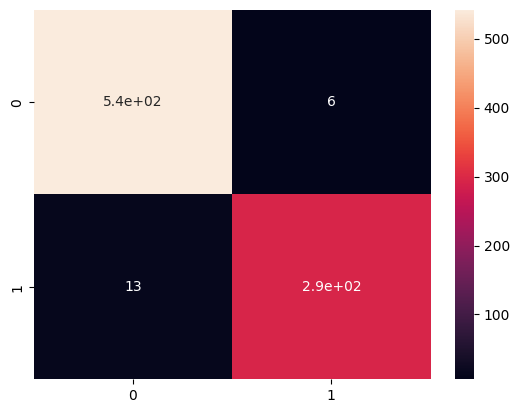

In [134]:
import seaborn as sns

sns.heatmap(cm,annot=True)

In [135]:
cm

array([[542,   6],
       [ 13, 293]], dtype=int64)

In [159]:
# Split the dataset into training and test sets
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

# Scale the data
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Define the ANN model
model = Sequential([
    Dense(64, activation='relu', input_shape=(X_train_scaled.shape[1],)),
    Dense(32, activation='relu'),
    Dense(1, activation='sigmoid')  # For binary classification
])

# Compile the model
model.compile(optimizer=Adam(), loss='binary_crossentropy', metrics=['accuracy'])

# Train the model
model.fit(X_train_scaled, y_train, epochs=20, batch_size=32, validation_split=0.2, verbose=1)

# Evaluate the model
loss, accuracy = model.evaluate(X_test_scaled, y_test, verbose=1)
print(f"Test Loss: {loss}, Test Accuracy: {accuracy}")

# Save the model
model_path = 'ann_model.h5'
model.save(model_path)
print(f"Model saved to {model_path}")

Epoch 1/20
86/86 [==============================] - 2s 8ms/step - loss: 0.4538 - accuracy: 0.8023 - val_loss: 0.2765 - val_accuracy: 0.9180
Epoch 2/20
86/86 [==============================] - 0s 5ms/step - loss: 0.2384 - accuracy: 0.9151 - val_loss: 0.1873 - val_accuracy: 0.9370
Epoch 3/20
86/86 [==============================] - 0s 5ms/step - loss: 0.2036 - accuracy: 0.9198 - val_loss: 0.1686 - val_accuracy: 0.9385
Epoch 4/20
86/86 [==============================] - 0s 5ms/step - loss: 0.1868 - accuracy: 0.9268 - val_loss: 0.1549 - val_accuracy: 0.9473
Epoch 5/20
86/86 [==============================] - 0s 5ms/step - loss: 0.1723 - accuracy: 0.9392 - val_loss: 0.1451 - val_accuracy: 0.9517
Epoch 6/20
86/86 [==============================] - 0s 4ms/step - loss: 0.1628 - accuracy: 0.9396 - val_loss: 0.1347 - val_accuracy: 0.9531
Epoch 7/20
86/86 [==============================] - 0s 5ms/step - loss: 0.1548 - accuracy: 0.9458 - val_loss: 0.1366 - val_accuracy: 0.9531
Epoch 8/20
86/86 [==

C:\Users\Harshal\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\keras\src\engine\training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


In [162]:
import numpy as np
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.optimizers import Adam
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.datasets import make_classification
from sklearn.metrics import classification_report

In [163]:
y_pred = (model.predict(X_test_scaled) > 0.5).astype(int)
print(classification_report(y_test, y_pred))

27/27 [==============================] - 0s 3ms/step
              precision    recall  f1-score   support

           0       0.96      0.96      0.96       536
           1       0.93      0.92      0.93       318

    accuracy                           0.95       854
   macro avg       0.94      0.94      0.94       854
weighted avg       0.95      0.95      0.95       854



In [166]:
scaler_path = 'scaler.pkl'
joblib.dump(ss, scaler_path)
print(f'Scaler saved to {scaler_path}')

Scaler saved to scaler.pkl


In [165]:
from sklearn.preprocessing import StandardScaler
import joblib